Quimb

In [80]:
from quimb import *
from quimb.tensor import *
import numpy as np

In [81]:
H = NNI_ham_heis(4, bz=0.1,cyclic=False)

In [82]:
psi0 = MPS_neel_state(4)
tebd = TEBD(psi0, H)

In [83]:
tebd.split_opts['cutoff'] = 1e-12

time=np.arange(1,10,0.1)

mzt=[]

In [84]:
for psit in tebd.at_times(time,tol=1e-3):
    mz = []
    mz += [psit.magnetization(0)]
    mzt+=[mz]

t=9.9, max-bond=4: 100%|###############################################################| 90/90 [00:01<00:00, 68.76it/s]


TenPy TEBD

In [86]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib

In [87]:
import tenpy
import tenpy.linalg.np_conserved as npc
from tenpy.algorithms import tebd
from tenpy.networks.mps import MPS
from tenpy.models.xxz_chain import XXZChain

In [88]:
L=4
model_params={'L':L,'Jxx':1,'Jz':1,'hz':-0.1,'bc_MPS': 'finite'}
M =XXZChain(model_params)

Reading 'L'=4 for config XXZChain
Reading 'Jxx'=1 for config XXZChain
Reading 'Jz'=1 for config XXZChain
Reading 'hz'=-0.1 for config XXZChain
Reading 'bc_MPS'='finite' for config XXZChain


In [89]:
psi=["up", "down"] * (L//2)
psi = MPS.from_product_state(M.lat.mps_sites(), psi, bc=M.lat.bc_MPS)

tebd_params = {
    'N_steps': 1,
    'dt': 0.1,
    'order': 4,
    'trunc_params': {'chi_max': 100, 'svd_min': 1.e-12}
}
eng = tebd.Engine(psi, M, tebd_params)

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TEBD


In [90]:
def measurement(eng, data):
    keys = ['t', 'Sz']
    if data is None:
        data = dict([(k, []) for k in keys])
    data['t'].append(eng.evolved_time)   
    data['Sz'].append(eng.psi.expectation_value('Sz'))
    
    return data


In [91]:
data = measurement(eng, None)
while eng.evolved_time < 10.:
    eng.run()
    measurement(eng, data)

Reading 'dt'=0.1 for config TEBD
Reading 'N_steps'=1 for config TEBD
Reading 'order'=4 for config TEBD
Calculate U for  {'order': 4, 'delta_t': 0.1, 'type_evo': 'real', 'E_offset': None, 'tau': 0.1}
--> time=0.100, max_chi=4, Delta_S=1.7440e-02, S=0.0174402760, since last update: 0.1 s
--> time=0.200, max_chi=4, Delta_S=3.8132e-02, S=0.0555721108, since last update: 0.0 s
--> time=0.300, max_chi=4, Delta_S=5.0282e-02, S=0.1058542687, since last update: 0.1 s
--> time=0.400, max_chi=4, Delta_S=5.7484e-02, S=0.1633385325, since last update: 0.1 s
--> time=0.500, max_chi=4, Delta_S=6.1091e-02, S=0.2244294717, since last update: 0.0 s
--> time=0.600, max_chi=4, Delta_S=6.1978e-02, S=0.2864073874, since last update: 0.1 s
--> time=0.700, max_chi=4, Delta_S=6.0843e-02, S=0.3472502786, since last update: 0.0 s
--> time=0.800, max_chi=4, Delta_S=5.8285e-02, S=0.4055350948, since last update: 0.1 s
--> time=0.900, max_chi=4, Delta_S=5.4819e-02, S=0.4603543058, since last update: 0.1 s
--> time=

--> time=9.200, max_chi=4, Delta_S=5.6421e-03, S=0.7360087166, since last update: 0.1 s
--> time=9.300, max_chi=4, Delta_S=4.8825e-03, S=0.7408912378, since last update: 0.1 s
--> time=9.400, max_chi=4, Delta_S=3.9369e-03, S=0.7448281360, since last update: 0.1 s
--> time=9.500, max_chi=4, Delta_S=2.9014e-03, S=0.7477295519, since last update: 0.1 s
--> time=9.600, max_chi=4, Delta_S=1.8558e-03, S=0.7495853180, since last update: 0.1 s
--> time=9.700, max_chi=4, Delta_S=8.6657e-04, S=0.7504518909, since last update: 0.1 s
--> time=9.800, max_chi=4, Delta_S=9.5445e-06, S=0.7504423464, since last update: 0.1 s
--> time=9.900, max_chi=4, Delta_S=7.2446e-04, S=0.7497178868, since last update: 0.1 s
--> time=10.000, max_chi=4, Delta_S=1.2388e-03, S=0.7484790624, since last update: 0.1 s
--> time=10.100, max_chi=4, Delta_S=1.5238e-03, S=0.7469553079, since last update: 0.1 s


In [92]:
sz=data['Sz']
z=[]
for x in sz:
    z.append(x[0])
   

In [93]:
import quimb as qu
L=int(input('Enter No. of Particles:'))
H = qu.ham_heis(L,b=(0,0,0.1),sparse=True,cyclic=False)

u=qu.up(sparse=True)
d=qu.down(sparse=True)    
r=np.array([1])
S_i=qu.qu(r,qtype='ket',sparse=True)
for l in range(L):
    if l%2==0:
        S_i=qu.kron(S_i,u)
    else:
        S_i=qu.kron(S_i,d)
  

GS=qu.qu(qu.groundstate(H),sparse=True)
Sz0=qu.ikron(qu.spin_operator('z'),[2]*L , inds=[0])
el=list()
evo=qu.Evolution(S_i,H)
for pt in evo.at_times(np.arange(0,10,0.1)):
    e=qu.expec(pt,Sz0)
    el.append(e)   

Enter No. of Particles:4


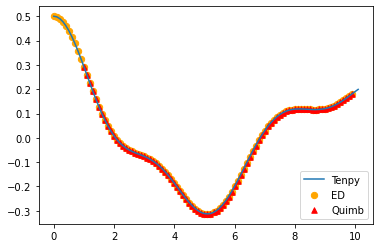

In [95]:
plt.plot(data['t'], z)
plt.scatter(np.arange(0,10,0.1),el,color='orange',s=40)
plt.scatter(time,mzt,marker='^',color='red',s=30)
plt.legend(["Tenpy", "ED","Quimb"], loc ="lower right")